In [33]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Data/White_Variety.csv')

# Convert 'Price Date' to datetime format
df['Price Date'] = pd.to_datetime(df['Price Date'], format='%Y-%m-%d')

# Select relevant columns and set 'Price Date' as the index
df_new = df[["Price Date", "Modal Price (Rs./Quintal)"]]

# Group by 'Price Date' and compute the mean
grouped_data = df_new.groupby("Price Date").mean()

# Convert the index to a period (daily frequency)
average_prices = grouped_data.to_period("D")

# Print the result
print(average_prices)


            Modal Price (Rs./Quintal)
Price Date                           
2019-10-31                8854.900000
2019-11-01                9385.238095
2019-11-02                9147.720930
2019-11-03                8768.888889
2019-11-04                9199.375000
...                               ...
2024-10-26               11096.297297
2024-10-27               10635.166667
2024-10-28               11361.281250
2024-10-29               10820.263158
2024-10-30               10780.000000

[1744 rows x 1 columns]


In [25]:
df.shape[0]

32917

In [34]:
data = average_prices

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [5]:
data = df.rename(columns={'Price Date': 'ds', 'Modal Price (Rs./Quintal)': 'y'})

# Ensure the date column 'ds' is in datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Check the data format
print(data.head())

          ds Variety Grade  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0 2019-10-31   White   FAQ                     7000                     9000   
1 2019-10-31   White   FAQ                     8840                     8840   
2 2019-10-31   White   FAQ                     8900                     9250   
3 2019-10-31   White   FAQ                     8600                    10140   
4 2019-10-31   White   FAQ                     9135                     9930   

        y  
0  8500.0  
1  8840.0  
2  9050.0  
3  9200.0  
4  9600.0  


In [6]:
# Initialize the Prophet model
model = Prophet()

# Fit the model on the data
model.fit(data)

19:14:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:12 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(data, periods=365)
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
model.plot(forecast)
plt.show()


TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

          ds       y
0 2019-10-31  8500.0
1 2019-10-31  8840.0
2 2019-10-31  9050.0
3 2019-10-31  9200.0
4 2019-10-31  9600.0


19:51:04 - cmdstanpy - INFO - Chain [1] start processing
19:51:24 - cmdstanpy - INFO - Chain [1] done processing


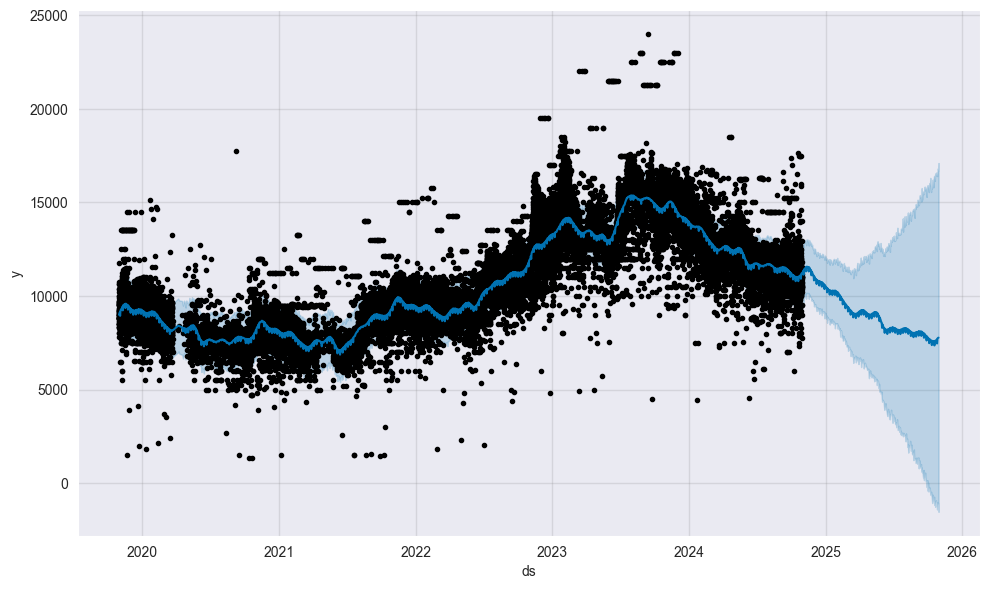

In [48]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

data = pd.read_csv('Data/White_Variety.csv')
data = data.rename(columns={'Price Date': 'ds', 'Modal Price (Rs./Quintal)': 'y'})
data = data[["ds", "y"]]
data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d')
print(data.head())
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast)
plt.show()


In [36]:
data

,y
Price Date,
2019-10-31,8854.900000
2019-11-01,9385.238095
2019-11-02,9147.720930
2019-11-03,8768.888889
2019-11-04,9199.375000
...,...
2024-10-26,11096.297297
2024-10-27,10635.166667
2024-10-28,11361.281250


In [49]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
data = pd.read_csv('Data/White_Variety.csv')
data = data.rename(columns={'Price Date': 'ds', 'Modal Price (Rs./Quintal)': 'y'})
data = data.groupby('ds').agg({'y': 'mean'}).reset_index()

# Convert 'ds' to datetime
data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d')

# Print the first few rows to check
print(data.head())

# Initialize and fit the Prophet model
model = Prophet()
model.fit(data)

# Create future dataframe for 365 days
future = model.make_future_dataframe(data, periods=365)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()


19:51:25 - cmdstanpy - INFO - Chain [1] start processing


          ds            y
0 2019-10-31  8854.900000
1 2019-11-01  9385.238095
2 2019-11-02  9147.720930
3 2019-11-03  8768.888889
4 2019-11-04  9199.375000


19:51:25 - cmdstanpy - INFO - Chain [1] done processing


TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'